In [3]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [4]:
root_folder = "../test/metrics"

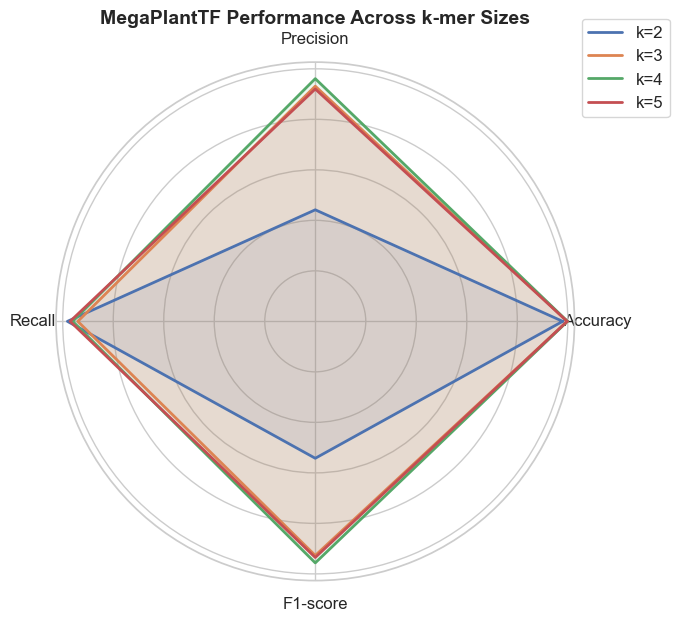

In [20]:
# Step 1: Load all JSON files
json_files = sorted(
    [f for f in os.listdir(root_folder) if f.startswith("binary_classifier_") and f.endswith(".json")]
)

all_metrics = {}

for file in json_files:
    k_value = file.split("_")[-1].split(".")[0]  # e.g. "2", "3", "4", "5"
    file_path = os.path.join(root_folder, file)
    
    with open(file_path, "r") as f:
        data = json.load(f)
    
    # Compute mean metric values across all families
    accuracies = [v["accuracy"] for v in data.values()]
    precisions = [v["precision"] for v in data.values()]
    recalls = [v["recall"] for v in data.values()]
    f1s = [v["f1"] for v in data.values()]
    
    all_metrics[k_value] = {
        "Accuracy": np.mean(accuracies),
        "Precision": np.mean(precisions),
        "Recall": np.mean(recalls),
        "F1-score": np.mean(f1s)
    }

# Step 2: Prepare data for radar chart
labels = list(list(all_metrics.values())[0].keys())
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # close the polygon

# Step 3: Plot radar chart
plt.figure(figsize=(7, 7))
ax = plt.subplot(111, polar=True)

for k, metrics in all_metrics.items():
    values = list(metrics.values())
    values += values[:1]
    ax.plot(angles, values, linewidth=2, label=f"k={k}")
    ax.fill(angles, values, alpha=0.1)

# Step 4: Style
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)
ax.set_yticklabels([])
plt.title("MegaPlantTF Performance Across k-mer Sizes", fontsize=14, weight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()

# Step 5: Save
plt.savefig("./spider_results/MegaPlantTF_Radar_Comparison.png", dpi=600, bbox_inches="tight", transparent=False)
plt.show()

In [6]:
families = list(data.keys())  # from one JSON file
metrics_list = ["accuracy", "precision", "recall", "f1"]

for fam in families[:5]:  # limit to first 5 for readability
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)
    
    for k, metrics in all_metrics.items():
        # load again each file to get per-family values
        with open(os.path.join(root_folder, f"binary_classifier_{k}.json")) as f:
            data = json.load(f)
        if fam not in data:
            continue
        
        values = [data[fam][m] for m in metrics_list]
        values += values[:1]
        ax.plot(angles, values, linewidth=2, label=f"k={k}")
        ax.fill(angles, values, alpha=0.1)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([m.capitalize() for m in metrics_list], fontsize=11)
    ax.set_yticklabels([])
    plt.title(f"{fam} — Performance Across k-mer Sizes", fontsize=12, weight='bold')
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    plt.tight_layout()
    plt.savefig(f"./spider_results/radar_{fam}_kmer.png", dpi=600, bbox_inches="tight")
    plt.close()


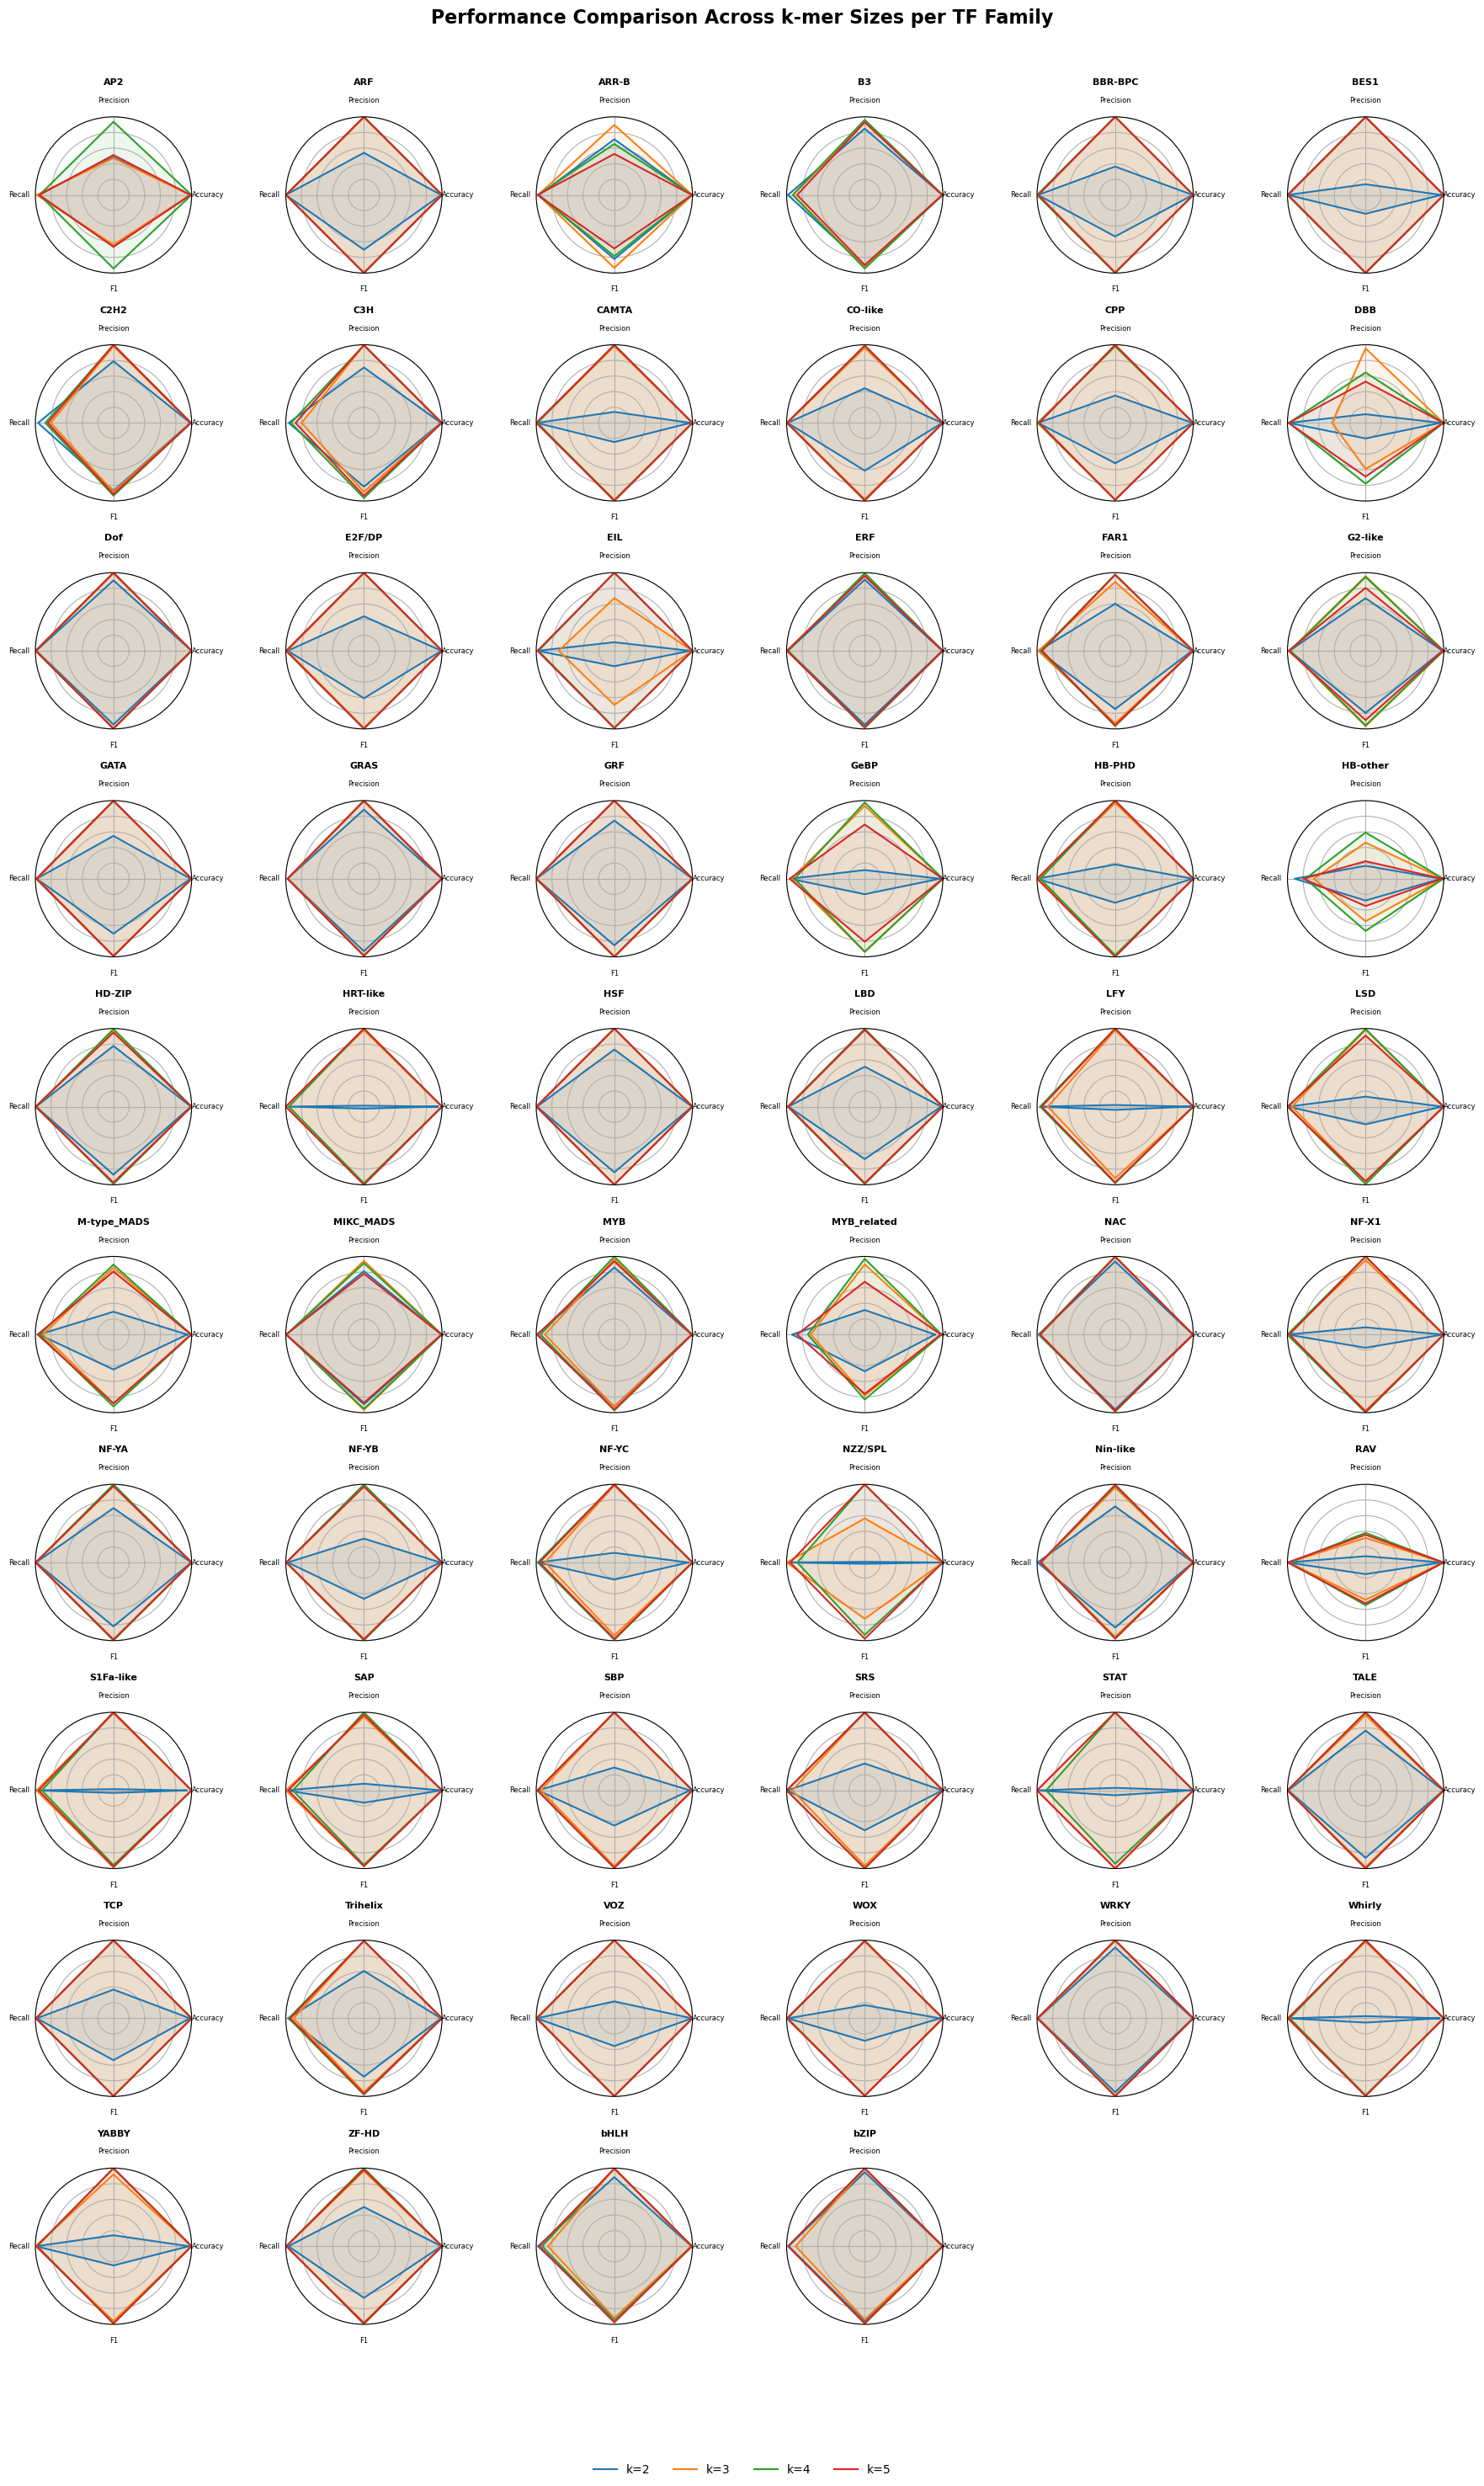

In [9]:
output_path = "./spider_results/MegaPlantTF_RadarGrid_AllFamilies.png"
metrics_list = ["accuracy", "precision", "recall", "f1"]

# Step 1 — Load all JSONs
json_files = sorted(
    [f for f in os.listdir(root_folder) if f.startswith("binary_classifier_") and f.endswith(".json")]
)
k_values = [f.split("_")[-1].split(".")[0] for f in json_files]

# Load one file to extract family names
with open(os.path.join(root_folder, json_files[0])) as f:
    reference_data = json.load(f)
families = list(reference_data.keys())

# Radar setup
angles = np.linspace(0, 2 * np.pi, len(metrics_list), endpoint=False).tolist()
angles += angles[:1]

# Step 2 — Create figure grid
n_rows, n_cols = 10, 6
fig, axes = plt.subplots(
    n_rows, n_cols,
    subplot_kw=dict(polar=True),
    figsize=(18, 30)
)
axes = axes.flatten()

# Step 3 — Iterate through families
for idx, fam in enumerate(families[:len(axes)]):
    ax = axes[idx]

    for file in json_files:
        k = file.split("_")[-1].split(".")[0]
        with open(os.path.join(root_folder, file)) as f:
            data = json.load(f)
        if fam not in data:
            continue
        values = [data[fam][m] for m in metrics_list]
        values += values[:1]
        ax.plot(angles, values, linewidth=1.5, label=f"k={k}")
        ax.fill(angles, values, alpha=0.08)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([m.capitalize() for m in metrics_list], fontsize=6)
    ax.set_yticklabels([])
    ax.set_title(fam, fontsize=8, weight="bold", pad=10)
    ax.set_ylim(0, 1)  # normalize scale 0–1

# Remove extra subplots if fewer than 60 families
for j in range(len(families), len(axes)):
    fig.delaxes(axes[j])

# Step 4 — Adjust layout and legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=len(k_values), fontsize=10, frameon=False)
fig.suptitle("Performance Comparison Across k-mer Sizes per TF Family", fontsize=16, weight="bold")
plt.tight_layout(rect=[0, 0.05, 1, 0.97])

# Step 5 — Save single high-quality image
os.makedirs(os.path.dirname(output_path), exist_ok=True)
plt.savefig(output_path, dpi=600, bbox_inches="tight", transparent=False)
plt.show()


/var/folders/w8/b_cflrn97k9c15rcrn5t8mmr0000gn/T/ipykernel_94422/625761836.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="k-mer", y="F1", palette="viridis")


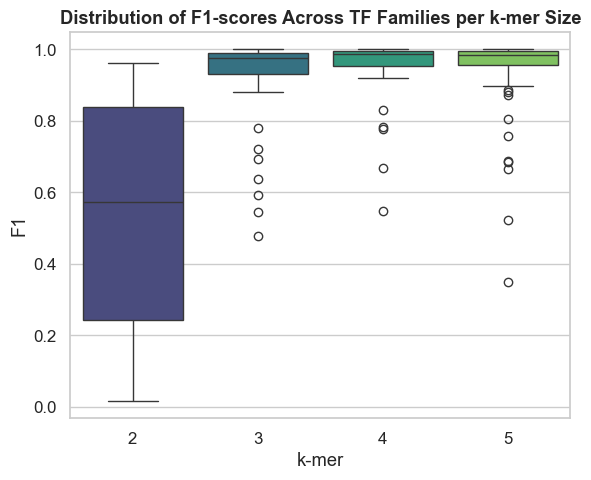

In [19]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = []  # gather data from JSONs
for k, file in zip([2, 3, 4, 5], json_files):
    data = json.load(open(os.path.join(root_folder, file)))
    for fam, vals in data.items():
        df.append({"Family": fam, "k-mer": k, "F1": vals["f1"], "Accuracy": vals["accuracy"]})
df = pd.DataFrame(df)

plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="k-mer", y="F1", palette="viridis")
plt.title("Distribution of F1-scores Across TF Families per k-mer Size", weight="bold")
plt.tight_layout()
plt.savefig("./spider_results/F1_distribution_kmer.png", dpi=600)
plt.show()


/var/folders/w8/b_cflrn97k9c15rcrn5t8mmr0000gn/T/ipykernel_94422/218842897.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


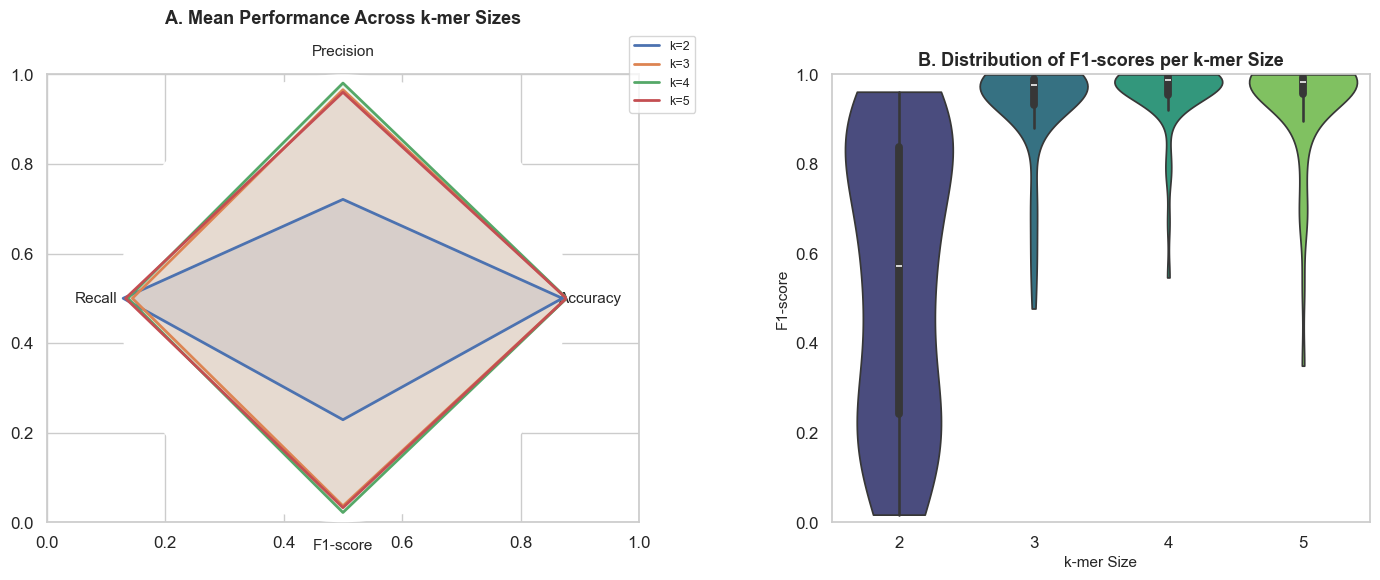

In [18]:
# --- Configuration ---
output_path = "./spider_results/MegaPlantTF_Radar_Boxplot_Combined.png"

# -----------------------------------------------------------
#  STEP 1: Load JSONs and aggregate global metrics
# -----------------------------------------------------------
json_files = sorted(
    [f for f in os.listdir(root_folder) if f.startswith("binary_classifier_") and f.endswith(".json")]
)
all_metrics = {}
records = []  # to collect family-level data for the violin plot

for file in json_files:
    k_value = file.split("_")[-1].split(".")[0]  # extract k-mer value (e.g., "2", "3", etc.)
    file_path = os.path.join(root_folder, file)
    
    with open(file_path, "r") as f:
        data = json.load(f)
    
    # --- Store per-family data for violin plot ---
    for fam, vals in data.items():
        records.append({
            "Family": fam,
            "k-mer": int(k_value),
            "F1": vals["f1"],
            "Accuracy": vals["accuracy"]
        })
    
    # --- Compute mean metrics for radar plot ---
    accuracies = [v["accuracy"] for v in data.values()]
    precisions = [v["precision"] for v in data.values()]
    recalls = [v["recall"] for v in data.values()]
    f1s = [v["f1"] for v in data.values()]
    
    all_metrics[k_value] = {
        "Accuracy": np.mean(accuracies),
        "Precision": np.mean(precisions),
        "Recall": np.mean(recalls),
        "F1-score": np.mean(f1s)
    }

# Convert per-family metrics to DataFrame
df = pd.DataFrame(records)

# -----------------------------------------------------------
#  STEP 2: Prepare data for radar chart
# -----------------------------------------------------------
labels = list(list(all_metrics.values())[0].keys())
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

# -----------------------------------------------------------
#  STEP 3: Create figure with subplots (Radar + Violin)
# -----------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={"width_ratios": [1.1, 1]})
plt.subplots_adjust(wspace=0.3)

# -----------------------------------------------------------
#  Left subplot — Radar Chart (No gridlines)
# -----------------------------------------------------------
ax = plt.subplot(121, polar=True)

# Plot each k-mer line
for k, metrics in all_metrics.items():
    values = list(metrics.values())
    values += values[:1]
    ax.plot(angles, values, linewidth=2, label=f"k={k}")
    ax.fill(angles, values, alpha=0.1)

# Clean minimalist style — no gridlines or polar frame
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=11)
ax.set_yticklabels([])
ax.set_ylim(0, 1)
ax.spines['polar'].set_visible(False)  # remove outer circular frame
ax.grid(False)                         # remove all gridlines
ax.set_facecolor("white")              # white background

# Optional: make axis labels slightly bolder
for label in ax.get_xticklabels():
    label.set_fontweight("medium")

# Title and legend
ax.set_title("A. Mean Performance Across k-mer Sizes", fontsize=13, weight='bold', pad=15)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=9)

# -----------------------------------------------------------
#  Right subplot — Violin Plot
# -----------------------------------------------------------
ax2 = axes[1]
sns.violinplot(
    data=df,
    x="k-mer",
    y="F1",
    palette="viridis",
    inner="box",
    ax=ax2,
    cut=0
)
ax2.set_title("B. Distribution of F1-scores per k-mer Size", fontsize=13, weight='bold')
ax2.set_xlabel("k-mer Size", fontsize=11)
ax2.set_ylabel("F1-score", fontsize=11)
ax2.set_ylim(0, 1)
ax2.set_facecolor("white")
ax2.grid(False)  # also remove background gridlines for uniform look

# -----------------------------------------------------------
#  STEP 4: Save high-quality figure
# -----------------------------------------------------------
plt.tight_layout()
os.makedirs(os.path.dirname(output_path), exist_ok=True)
plt.savefig(output_path, dpi=600, bbox_inches="tight", transparent=False)
plt.show()
